In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from relational_embedder.data_prep import data_prep_utils as dpu
import numpy as np
from relational_embedder import api
from relational_embedder.api import Fabric
from relational_embedder.api import SIMF
import word2vec
import pickle
import itertools
path_to_row_we_model = 'models/db2vec_complete_first/row_we_db2vec_75_ns50_fns20_i40.bin'
path_to_col_we_model = 'models/db2vec_complete_first/col_we_w2v_75_ns50_i40.bin'
row_we_model = word2vec.load(path_to_row_we_model)
col_we_model = word2vec.load(path_to_col_we_model)
path_to_row_relemb = 'models/db2vec_complete_first/relemb/row.pkl'
path_to_col_relemb = 'models/db2vec_complete_first/relemb/col.pkl'
row_word_hubness_path = "models/db2vec_complete_first/relemb/row_hubness.pkl"
col_word_hubness_path = "models/db2vec_complete_first/relemb/col_hubness.pkl"
with open(row_word_hubness_path, "rb") as f:
    row_word_hubness = pickle.load(f)
with open(col_word_hubness_path, "rb") as f:
    col_word_hubness = pickle.load(f)
with open(path_to_row_relemb, "rb") as f:
    row_relemb = pickle.load(f)
with open(path_to_col_relemb, "rb") as f:
    col_relemb = pickle.load(f)
fabric = Fabric(row_we_model, col_we_model, row_relemb, col_relemb, None, row_word_hubness)

In [3]:
# vis imports
#import matplotlib
#matplotlib.use('Agg')
import hypertools as hyp
from collections import defaultdict
%matplotlib inline

In [4]:
list_of_arrays = fabric.M_R.vectors

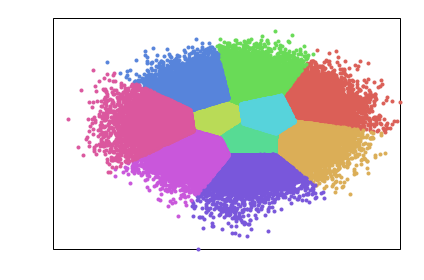

In [5]:
hyp.plot(list_of_arrays, '.', ndims=2, n_clusters=10)

## plotting all relations

#### this is done on the benchmark data and not the entire mit dwh

In [5]:
# get relations
all_rels = []
all_vecs = []
for relation in fabric.RE_C.keys():
    all_rels.append(relation)
    v = fabric.RE_C[relation]['vector']
    all_vecs.append(v)
all_rels = np.asarray(all_rels)
all_vecs = np.asarray(all_vecs)

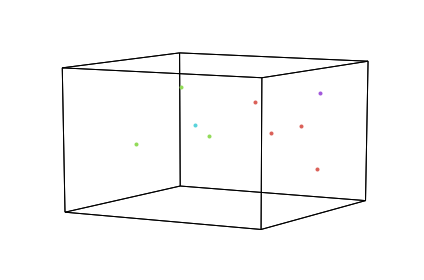

In [6]:
hyp.plot(all_vecs, '.', ndims=3, n_clusters=4)

## plotting all rows

In [12]:
# get rows
all_labels = []
all_rows = []
sampler = 0
last_relation = None
for vec, relation, row_idx in fabric.row_iterator_r():
    sampler += 1
    if sampler > 500:
        if relation != last_relation:
            sampler = 0
            last_relation = relation
        continue
    else:
        last_relation = relation
    all_labels.append(relation)
    all_rows.append(vec)
all_rows = np.asarray(all_rows)
all_labels = np.asarray(all_labels)

In [13]:
# for vec, relation, row_idx in fabric.row_iterator_r():
#     if np.isnan(vec).any():
#         print("Bad: " + str(row_idx))

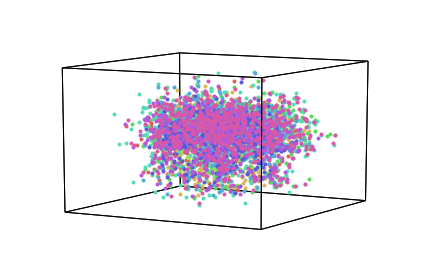

In [14]:
hyp.plot(all_rows, '.', ndims=3, hue=all_labels)

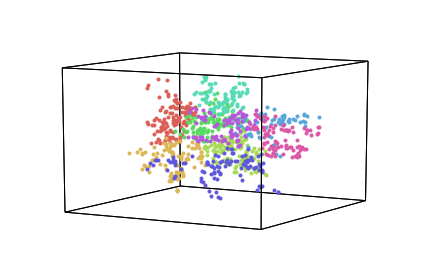

In [10]:
hyp.plot(all_rows, '.', ndims=2, n_clusters=9)

## plot all columns

In [15]:
# get rows
all_labels = []
all_cols = []
sampler = 0
last_relation = None
for vec, relation, col in fabric.column_iterator_c():
    all_labels.append(relation)
    all_cols.append(vec)
all_cols = np.asarray(all_cols)

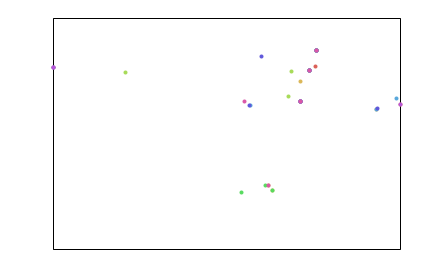

In [16]:
hyp.plot(all_cols, '.', ndims=2, hue=all_labels)

## plotting rows of one relation

In [26]:
# get rows for relation
relation = 'table_0.csv'
all_rows = list(fabric.RE_R[relation]['rows'].values())
all_rows = np.asarray(all_rows)

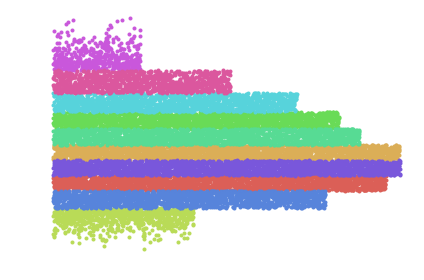

In [38]:
hyp.plot(all_rows, '.', ndims=1, n_clusters=10)